In [1]:
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx

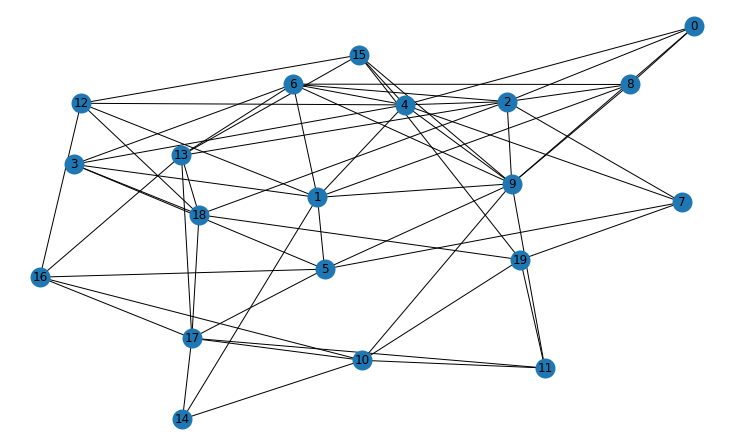

In [16]:
# Graph implementation
def generate_graph(cluster_sizes=[100,100], pin=0.5, pout=0.01, seed=0):
    """Generate a random connected graph"""
    probs = np.array([[pin, pout],[pout, pin]])
    while True:
        g = nx.stochastic_block_model(cluster_sizes, probs)
        if nx.algorithms.components.is_connected(g):
            return g


cluster_sizes = [10, 10]
pin = 0.5
pout = 0.1
seed = 0
alpha = 1e-3
lamda = 1e-3
eta = 1e-3
no_users = sum(cluster_sizes)
batch_size = 50
epochs = 1
it = 1000
G = generate_graph(cluster_sizes, pin, pout, seed)

nx.draw(G, with_labels=True, node_size=100, alpha=1, linewidths=10)
plt.show()

In [3]:
def degrees(A):
    """Return the degrees of each node of a graph from its adjacency matrix"""
    return np.sum(A, axis=0).reshape(A.shape[0], 1)

def node_degree(n, G):
    cnt = 0
    for i in G.neighbors(n):
        cnt += 1
    return cnt

def get_neighbors(n, G):
    neighbors_list = []
    for i in G.neighbors(n):
        neighbors_list.append(int(i))
    return neighbors_list

In [4]:
datapoints = {}
count = 0
W1 = np.array([2, 2])
W2 = np.array([-2, 2])
W = [W1, W2]
m = 200
n = 2
noise_sd = 0.001
for i, cluster_size in enumerate(cluster_sizes):
    for j in range(cluster_size):
        features = np.random.normal(loc=0.0, scale=1.0, size=(m, n))
        label = np.dot(features, W[i]) + np.random.normal(0,noise_sd)
        datapoints[count] = {
                'features': features,
                'degree': node_degree(count, G),
                'label': label,
                'neighbors': get_neighbors(count, G),
                'exact_weights': W[i]
            }
        count += 1

Text(0.5, 0, 'W2-Cluster2')

<Figure size 720x432 with 0 Axes>

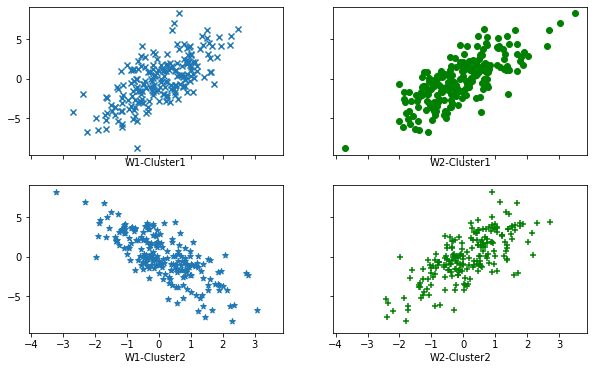

In [5]:
plt.rcParams['figure.figsize'] = [10, 6]
f = plt.figure() 


f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)

axes[0][0].scatter(datapoints[0]['features'][:, 0],datapoints[0]['label'], marker = "x")
axes[0][0].set_xlabel('W1-Cluster1', labelpad = 3)

axes[0][1].scatter(datapoints[0]['features'][:, 1],datapoints[0]['label'], marker = "o", color='green')
axes[0][1].set_xlabel('W2-Cluster1', labelpad = 3)

axes[1][0].scatter(datapoints[11]['features'][:, 0],datapoints[11]['label'], marker = "*")
axes[1][0].set_xlabel('W1-Cluster2', labelpad = 3)

axes[1][1].scatter(datapoints[11]['features'][:, 1],datapoints[11]['label'], marker = "+", color='green')
axes[1][1].set_xlabel('W2-Cluster2', labelpad = 3)


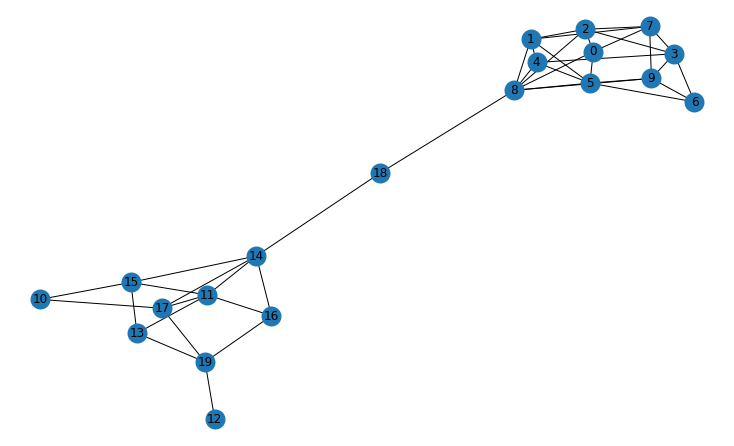

In [6]:
nx.draw(G, with_labels=True, node_size=100, alpha=1, linewidths=10)


In [17]:
#rel_err_dfed0_001 = np.load('relative_error_dfedu0_001.npy').ravel()
#rel_err_sheave_fml0_001 = np.load('relative_error_sheave_fml0_001.npy').ravel()


#loss_dfed0_001 = np.load('training_loss_dfedu0_001.npy').ravel()
loss_sheave_fml0_001 = np.load('training_loss_sheave_fml0_001.npy').ravel()



#rel_err_dfed0_01 = np.load('relative_error_dfedu0_01.npy').ravel()
#rel_err_sheave_fml0_01 = np.load('relative_error_sheave_fml0_01.npy').ravel()


loss_dfed0_01 = np.load('training_loss_dfedu0_001_pout0_2.npy').ravel()
loss_sheave_fml0_01 = np.load('training_loss_sheave_fml_lambda0_01_pout0_2.npy').ravel()



#rel_err_dfed0_1 = np.load('relative_error_dfedu0_1.npy').ravel()
#rel_err_sheave_fml0_1 = np.load('relative_error_sheave_fml0_1.npy').ravel()


#loss_dfed0_1 = np.load('training_loss_dfedu0_1.npy').ravel()
#loss_sheave_fml0_1 = np.load('training_loss_sheave_fml0_1.npy').ravel()


No handles with labels found to put in legend.


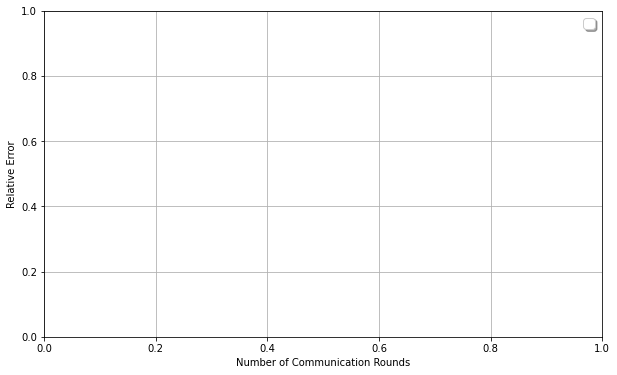

In [18]:
#plt.semilogy(rel_err_dfed0_001, label='dFedU001') # dFedU
#plt.semilogy(rel_err_sheave0_fml_001, label='FedSheaves001')

#plt.semilogy(rel_err_dfed0_01, label='dFedU01') # dFedU
#plt.semilogy(rel_err_sheave0_fml_01, label='FedSheaves01')

#plt.semilogy(rel_err_dfed0_1, label='dFedU1') # dFedU
#plt.semilogy(rel_err_sheave_fml0_1, label='FedSheaves1')















plt.xlabel('Number of Communication Rounds') # Federated Sheaves
plt.ylabel('Relative Error')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
#plt.savefig("Relative Error.pdf")
#plt.ylim([10**(-5),0.5])

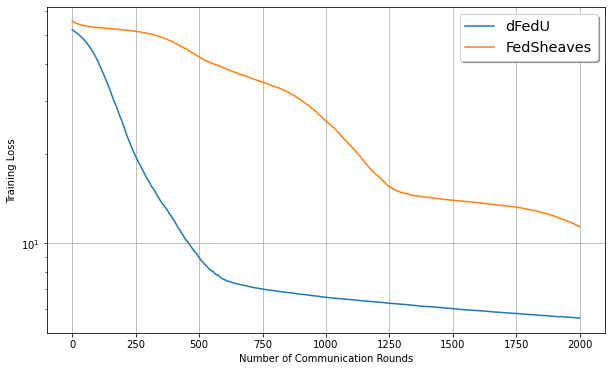

In [23]:
#plt.semilogy(loss_dfed0_001, label='dFedU001') # dFedU
#plt.semilogy(loss_sheave_fml0_001, label='FedSheaves001')

plt.semilogy(loss_dfed0_01, label='dFedU') # dFedU
plt.semilogy(loss_sheave_fml0_01, label='FedSheaves')

#plt.semilogy(loss_dfed0_1, label='dFedU1') # dFedU
#plt.semilogy(loss_sheave_fml0_1, label='FedSheaves1')



plt.xlabel('Number of Communication Rounds') # Federated Sheaves
plt.ylabel('Training Loss')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
plt.savefig("Training Loss.pdf")
#plt.ylim([10**(-5),0.5])

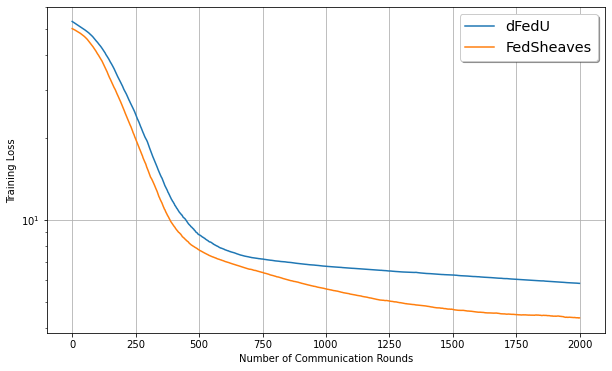

In [24]:
#rel_err_dfed0_001 = np.load('relative_error_dfedu0_001.npy').ravel()
#rel_err_sheave_fml0_001 = np.load('relative_error_sheave_fml0_001.npy').ravel()


#loss_dfed0_001 = np.load('training_loss_dfedu0_001.npy').ravel()
#loss_sheave_fml0_001 = np.load('training_loss_sheave_fml0_001.npy').ravel()



#rel_err_dfed0_01 = np.load('relative_error_dfedu0_01.npy').ravel()
#rel_err_sheave_fml0_01 = np.load('relative_error_sheave_fml0_01.npy').ravel()


loss_dfed0_01 = np.load('training_loss_dfedu0_001_pout0_2.npy').ravel()
loss_sheave_fml0_01 = np.load('training_loss_sheave_fml_lambda0_01_pout0_2.npy').ravel()


#rel_err_dfed0_1 = np.load('relative_error_dfedu0_1.npy').ravel()
#rel_err_sheave_fml0_1 = np.load('relative_error_sheave_fml0_1.npy').ravel()


#loss_dfed0_1 = np.load('training_loss_dfedu0_1.npy').ravel()
#loss_sheave_fml0_1 = np.load('training_loss_sheave_fml0_1.npy').ravel()


#plt.semilogy(loss_dfed0_001, label='dFedU001') # dFedU
#plt.semilogy(loss_sheave_fml0_001, label='FedSheaves001')

plt.semilogy(loss_dfed0_01, label='dFedU') # dFedU
plt.semilogy(loss_sheave_fml0_01, label='FedSheaves')

#plt.semilogy(loss_dfed0_1, label='dFedU1') # dFedU
#plt.semilogy(loss_sheave_fml0_1, label='FedSheaves1')



plt.xlabel('Number of Communication Rounds') # Federated Sheaves
plt.ylabel('Training Loss')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
plt.savefig("Training Loss.pdf")
#plt.ylim([10**(-5),0.5])
